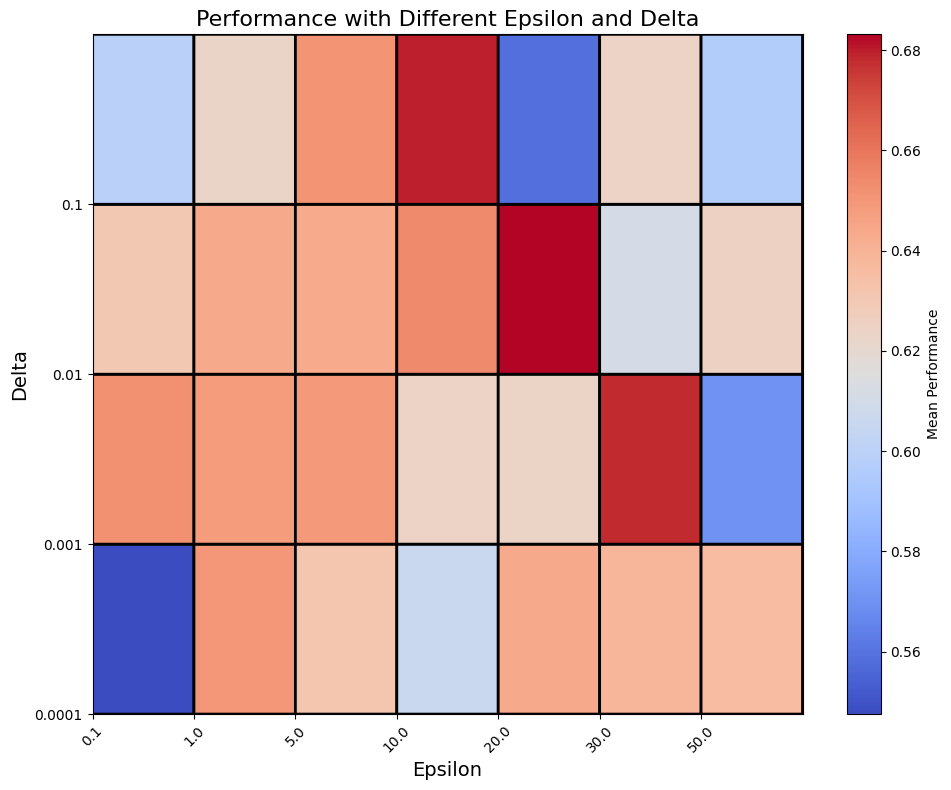

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('heart_results_1.csv')

# Filter relevant columns
data = data[['Epsilon', 'Delta', 'Mean_Performance']]

# Group data by Epsilon and Delta and calculate the mean performance
grouped_data = data.groupby(['Epsilon', 'Delta']).mean().reset_index()

# Pivot the data for easier plotting
pivot_data = grouped_data.pivot(index='Delta', columns='Epsilon', values='Mean_Performance')

# Plot the heatmap
plt.figure(figsize=(10, 8))
c = plt.pcolor(pivot_data, cmap='coolwarm', edgecolors='k', linewidths=2)
plt.colorbar(c, label='Mean Performance')

# Add labels and title
plt.title('Performance with Different Epsilon and Delta', fontsize=16)
plt.xlabel('Epsilon', fontsize=14)
plt.ylabel('Delta', fontsize=14)
plt.xticks(ticks=range(len(pivot_data.columns)), labels=pivot_data.columns, rotation=45)
plt.yticks(ticks=range(len(pivot_data.index)), labels=pivot_data.index)

plt.tight_layout()
plt.show()


In [5]:
# Print performance for specified epsilon values for each delta value
epsilon_values = [1, 10, 20, 30]
filtered_data = grouped_data[grouped_data['Epsilon'].isin(epsilon_values)]
print("Performance for Epsilon values (1, 10, 20, 30) for each Delta value:")
for delta in filtered_data['Delta'].unique():
    print(f"Delta = {delta}")
    for epsilon in epsilon_values:
        performance = filtered_data[(filtered_data['Delta'] == delta) & (filtered_data['Epsilon'] == epsilon)]['Mean_Performance']
        if not performance.empty:
            print(f"  Epsilon = {epsilon}: Performance = {performance.values[0]:.4f}")
        else:
            print(f"  Epsilon = {epsilon}: No Data")

Performance for Epsilon values (1, 10, 20, 30) for each Delta value:
Delta = 0.0001
  Epsilon = 1: Performance = 0.6499
  Epsilon = 10: Performance = 0.6061
  Epsilon = 20: Performance = 0.6436
  Epsilon = 30: Performance = 0.6391
Delta = 0.001
  Epsilon = 1: Performance = 0.6482
  Epsilon = 10: Performance = 0.6243
  Epsilon = 20: Performance = 0.6234
  Epsilon = 30: Performance = 0.6780
Delta = 0.01
  Epsilon = 1: Performance = 0.6434
  Epsilon = 10: Performance = 0.6541
  Epsilon = 20: Performance = 0.6832
  Epsilon = 30: Performance = 0.6110
Delta = 0.1
  Epsilon = 1: Performance = 0.6232
  Epsilon = 10: Performance = 0.6797
  Epsilon = 20: Performance = 0.5586
  Epsilon = 30: Performance = 0.6239
